In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.decomposition import PCA

In [2]:
# Following K-Means from homework
X_all = np.load(open('X_train.npy', 'rb'))

X1 = X_all[:100, :]    # 100 Drawings
X2 = X_all[100:200, :] # 100 Engravings
X3 = X_all[200:300, :] # 100 Iconography
X4 = X_all[300:400, :] # 100 Painting
X5 = X_all[400:500, :] # 100 Sculpture

X = np.concatenate((X1, X2, X3, X4, X5), axis=0)
X = np.transpose(X, (1,2,3,0)).reshape(-1, X.shape[0])
print('Shape of X:', X.shape)

Shape of X: (12288, 500)


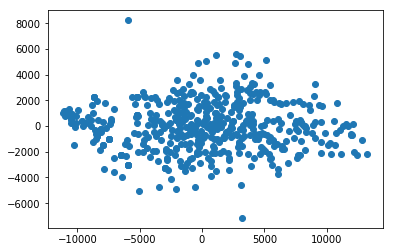

In [3]:
pca = PCA(n_components=2)
pca.fit(X.T)
X_proj = pca.transform(X.T)

# Plot
fig = plt.figure()
plt.scatter(X_proj[:,0], X_proj[:,1])
plt.show()

In [4]:
# Initialize centroids
def init_centroids(X, k):
    """
    Args:
    X -- data, shape (n, m)
    k -- number of clusters
    
    Return:
    centroids -- k randomly picked data points as initial centroids, shape (n, k)
    """
    assert(k > 1)
    np.random.seed(1)
    
    centroids = X[:,np.random.choice(X.shape[1],k,replace=False)]
    
    return centroids

In [5]:
# Compute distances
def compute_distances(X, centroids):
    """
    Args:
    X -- data, shape (n, m)
    centroids -- shape (n, k)
    
    Return:
    distances -- shape (k, m)
    """
    centroids_expanded = np.expand_dims(centroids,axis=1)
    distances = np.sqrt(np.sum(((np.transpose(X)-np.transpose(centroids_expanded))**2),axis=2))
    
    return distances

In [6]:
# Find the closest centroid for each data point
def closest_centroid(distances):
    """
    Args:
    distances -- numpy array of shape (k, m), output of compute_distances()
    
    Return:
    indices -- numpy array of shape (1, m)
    """
    indices = np.argmin(distances,axis=0)
    
    return indices

In [7]:
# Update centroids
def update_centroids(X, closest_indices, centroids):
    """
    Args:
    X -- data, shape (n, m)
    cloesest_indices -- output of closest_centroid()
    centroids -- old centroids positions
    
    Return:
    new_centroids -- new centroids positions, shape (n, k)
    """
            
    new_centroids = np.zeros((centroids.shape));
    
    for i in np.arange(centroids.shape[1]):
        new_centroids[:,i] = np.average(X[:, closest_indices==i],axis=1)    
    assert(centroids.shape == new_centroids.shape)
    
    return new_centroids

In [8]:
# K-means
def kmeans(X, k):
    """
    Args:
    X -- data, shape (n, m)
    k -- number of clusters
    
    Return:
    closest_indices -- final assignment of clusters to each data point, shape (1, m)
    centroids -- final positions of centroids
    """
    centroids = init_centroids(X,k)
    
    old_centroids = None
    while not np.array_equal(old_centroids, centroids):
        # Backup centroids
        old_centroids = np.copy(centroids)
        
        # Compute distances
        distances = compute_distances(X,centroids)
        
        # Find cloeset centroid
        closest_indices = closest_centroid(distances)
        
        # Update centroids
        centroids = update_centroids(X, closest_indices,old_centroids)
        ### END TODO ###
    
    return closest_indices, centroids

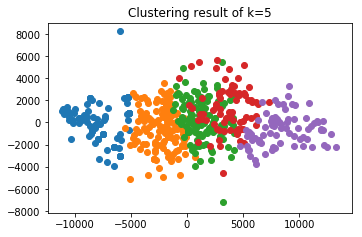

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X.T)
X_proj = pca.transform(X.T)

# Cluster and 
fig = plt.figure(figsize=(12, 3.5))

closest_indices, centroids = kmeans(X, 5)
fig.add_subplot(1, 2, 1)
plt.scatter(X_proj[closest_indices==0, 0], X_proj[closest_indices==0, 1])
plt.scatter(X_proj[closest_indices==1, 0], X_proj[closest_indices==1, 1])
plt.scatter(X_proj[closest_indices==2, 0], X_proj[closest_indices==2, 1])
plt.scatter(X_proj[closest_indices==3, 0], X_proj[closest_indices==3, 1])
plt.scatter(X_proj[closest_indices==4, 0], X_proj[closest_indices==4, 1])
plt.title('Clustering result of k=5')

plt.show()

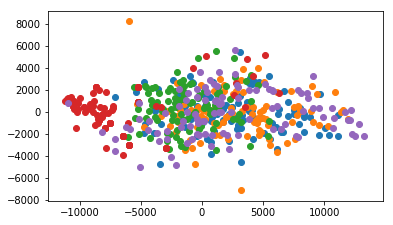

In [10]:
fig = plt.figure(figsize=(6, 3.5))

plt.scatter(X_proj[:100, 0], X_proj[:100, 1])
plt.scatter(X_proj[100:200, 0], X_proj[100:200, 1])
plt.scatter(X_proj[200:300, 0], X_proj[200:300, 1])
plt.scatter(X_proj[300:400, 0], X_proj[300:400, 1])
plt.scatter(X_proj[400:500, 0], X_proj[400:500, 1])

plt.show()